# Habib ur Rehman Owasi
# 6637017 RADI/M

# Wisconsin Breast Cancer dataset

In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 1. Data Preparation and Exploration


### Exploratory Data Analysis

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Get a statistical summary of the numerical columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
print("Wisconsis Breast Cancer dataset has {} rows with {} features.".format(*df.shape))

Wisconsis Breast Cancer dataset has 569 rows with 33 features.


### Missing Values

In [6]:
# Get the number of missing values in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [8]:
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)

In [9]:
print(df.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# find nulls

nulls = df.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', df.shape[0],'rows in the dataset')
print('There are', df.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 569 rows in the dataset
There are 31 columns (features) in the dataset
There are 0 nulls in the dataset


### Visualization

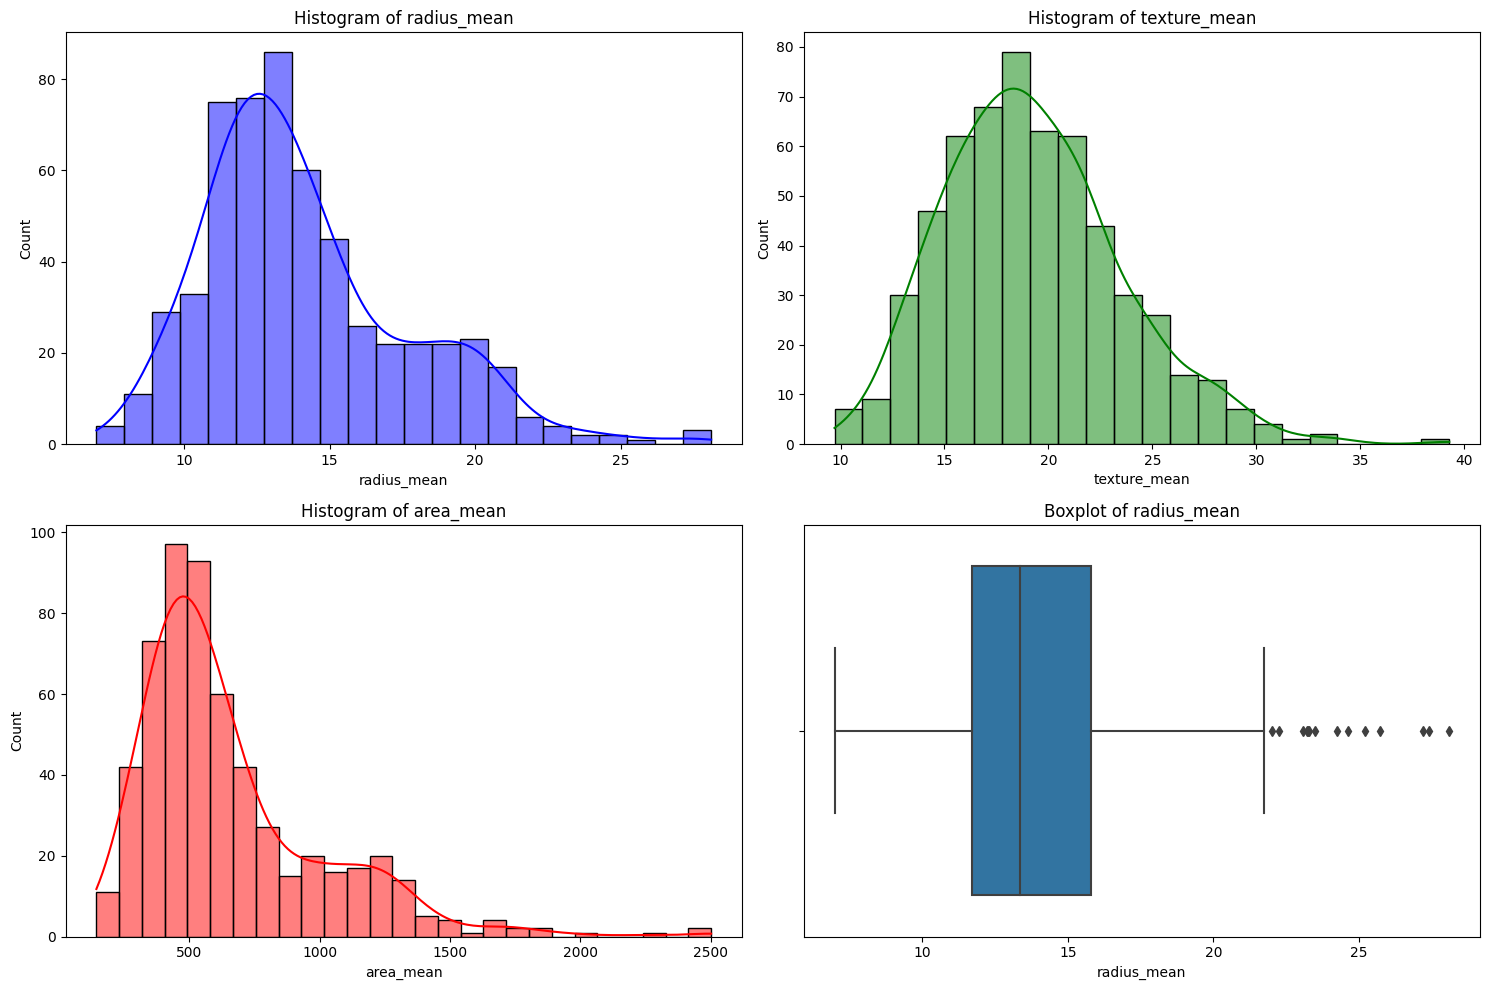

In [12]:
# Setting up the visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for 'radius_mean', 'texture_mean', and 'area_mean'
sns.histplot(df['radius_mean'], kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_title('Histogram of radius_mean')

sns.histplot(df['texture_mean'], kde=True, color="green", ax=axs[0, 1])
axs[0, 1].set_title('Histogram of texture_mean')

sns.histplot(df['area_mean'], kde=True, color="red", ax=axs[1, 0])
axs[1, 0].set_title('Histogram of area_mean')

# Boxplot for 'radius_mean'
sns.boxplot(x=df['radius_mean'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of radius_mean')

plt.tight_layout()
plt.show()

**Histograms** (*radius_mean, texture_mean, area_mean*):

These histograms display the distribution of values for three key features: radius_mean, texture_mean, and area_mean.
Each histogram shows the frequency of data points within a range of values, helping to understand the spread and central tendencies of these measurements.
The shape of the histogram (skewed) indicate the distribution type and highlight potential outliers or anomalies in the data.

**Boxplot** (*radius_mean*):

The boxplot for *radius_mean* provides a summary of its distribution, showcasing the median, quartiles, and potential outliers.
The central box represents the interquartile range (IQR), the line within the box shows the median, and the 'whiskers' extend to show the range of the data, excluding outliers.
Points outside the whiskers are potential outliers, indicating unusually high or low measurements compared to the rest of the data.

In [13]:
# Selecting a subset of columns for scatter plot and correlation heatmap
subset_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

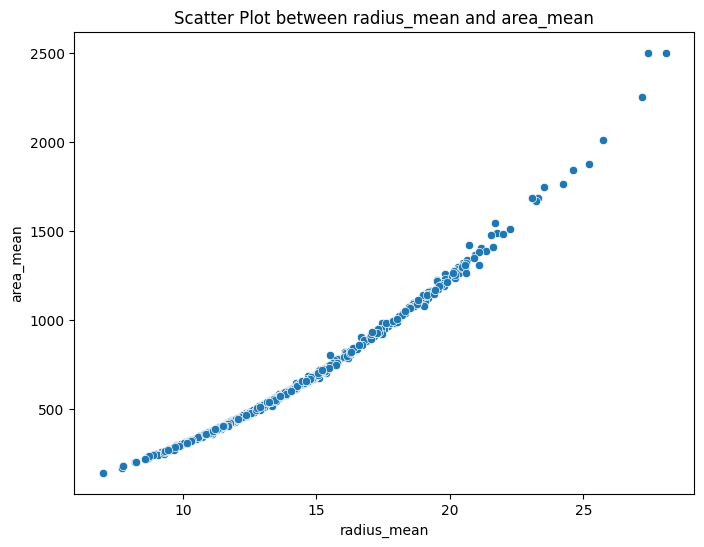

In [14]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='area_mean', data=df)
plt.title('Scatter Plot between radius_mean and area_mean')
plt.show()

**Scatter Plot** (*radius_mean vs. area_mean*):

This scatter plot visualizes the relationship between radius_mean and area_mean.
Each point on the plot corresponds to a single observation, with its position determined by the values of radius_mean (x-axis) and area_mean (y-axis).
Patterns in the scatter plot can reveal correlations or trends between these two features, such as a linear relationship, clusters, or lack of any discernible pattern.

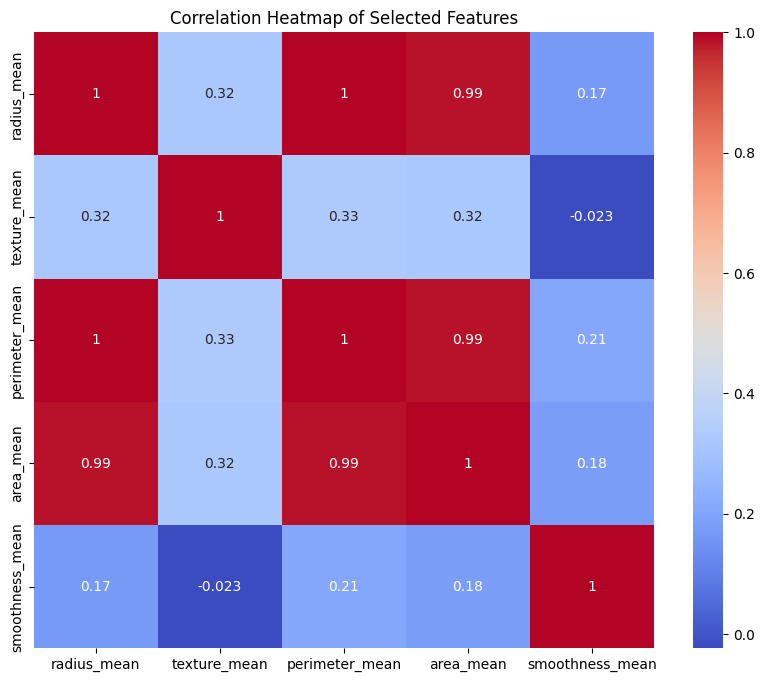

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[subset_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

**Correlation Heatmap** (*subset of features*):

The correlation heatmap displays the correlation coefficients between pairs of features in the selected subset.
Each cell in the heatmap shows the correlation between two features, with the color intensity and the annotation indicating the strength and direction of the relationship (ranging from -1 to 1).
This visualization is useful for identifying features that are strongly correlated, either positively or negatively, which can be crucial for feature selection and understanding the underlying structure of the data.

# 2. Feature Engineering and Selection

## Feature Importance

In [16]:
# rename some columns
df = df.rename(columns={'concave points_mean':'concave_points_mean',
                                'concave points_worst':'concave_points_worst', 'concave points_se':'concave_points_se'})

In [17]:
# Percentage of cancer and no breast cancer participants

count_no_cancer = len(df[df['diagnosis']=='B'])
count_cancer = len(df[df['diagnosis']=='M'])

pct_no_cancer = count_no_cancer/(count_no_cancer+count_cancer)*100
pct_of_cancer = count_cancer/(count_no_cancer+count_cancer)*100

print("No Breast Cancer: {:.1f}".format(pct_no_cancer), '%')
print("Breast Cancer: {:.1f}".format(pct_of_cancer), '%')

No Breast Cancer: 62.7 %
Breast Cancer: 37.3 %


In [18]:
# Convert 'M' to 1 and 'B' to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].unique()

array([1, 0])

In [19]:
#Loading the dataset
array = df.values
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [20]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.3 MB/s eta 0:00:00


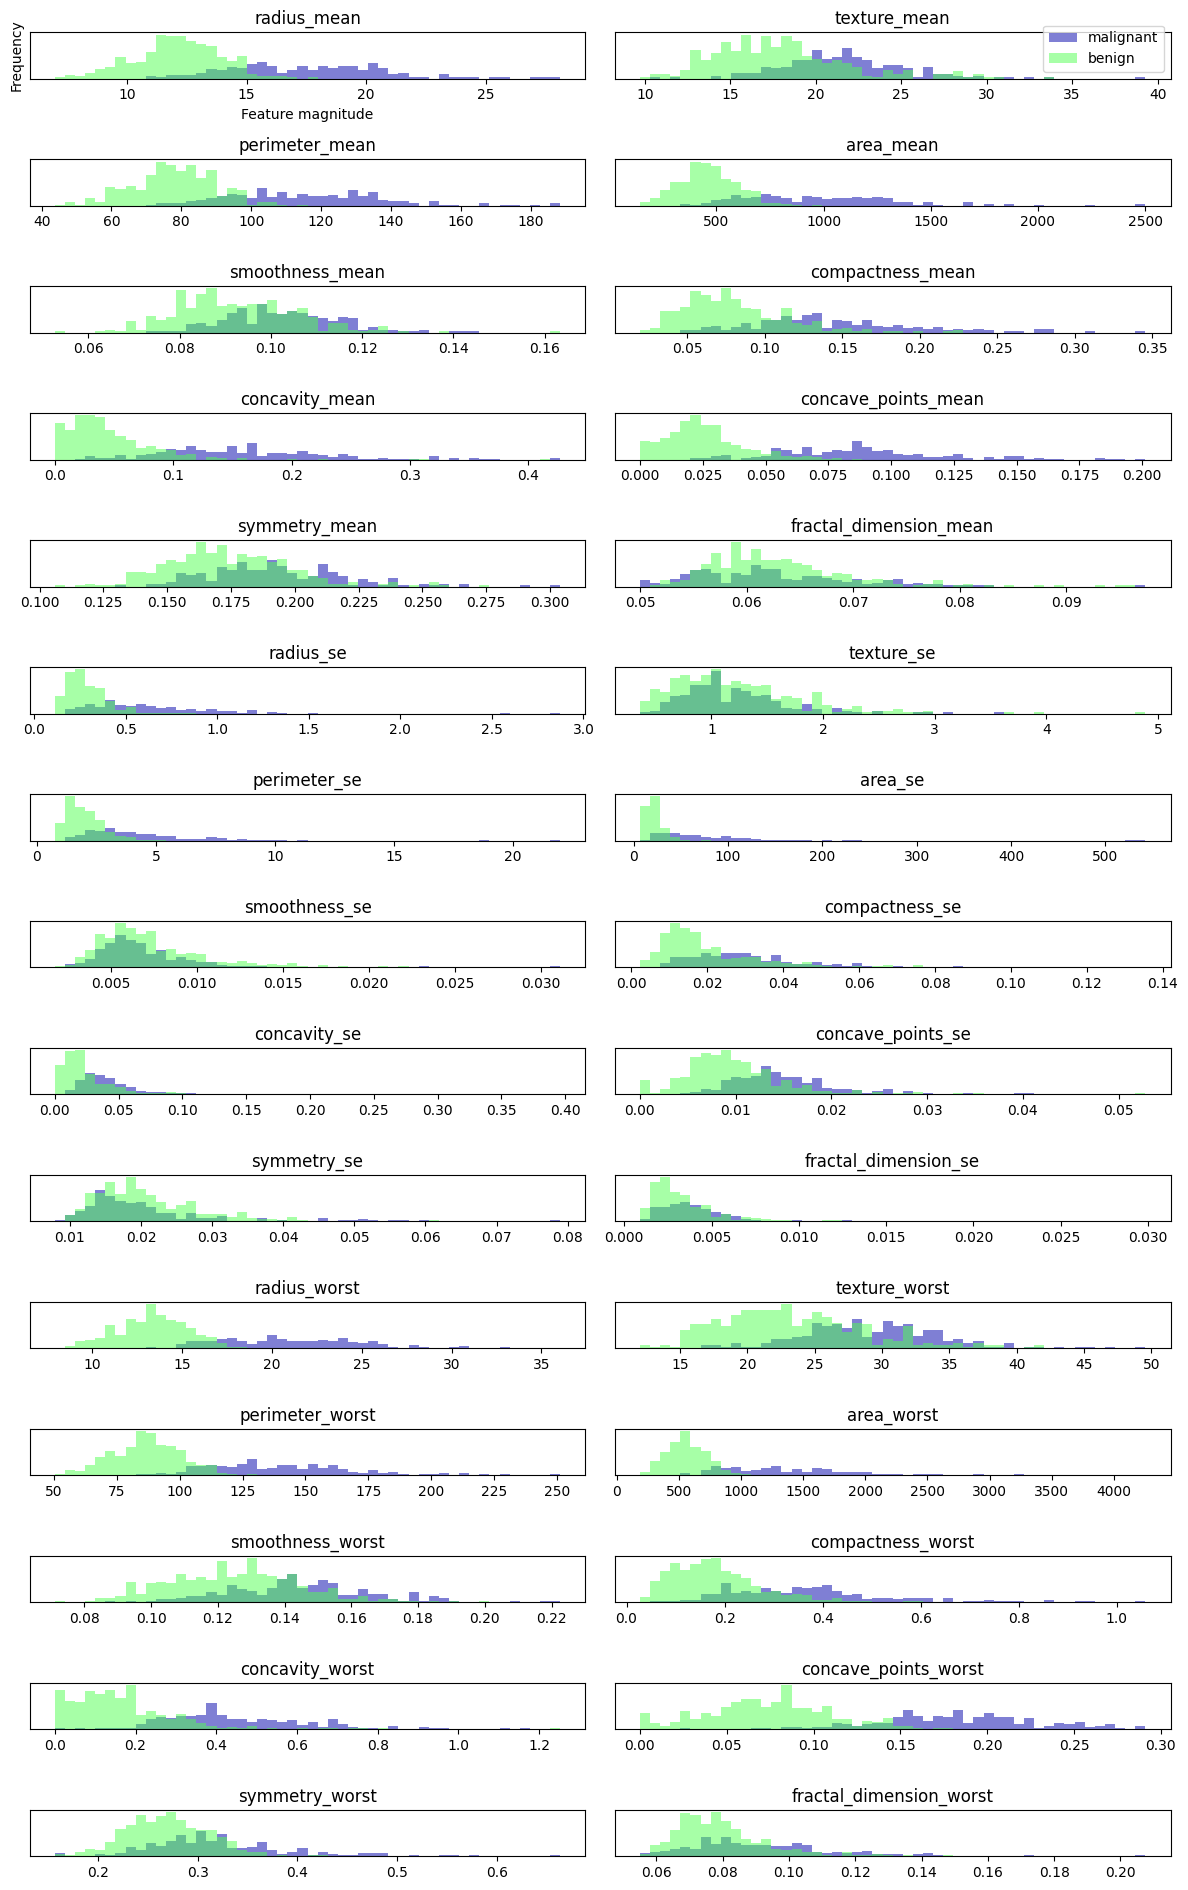

In [22]:
#  Per-class feature histograms on the Breast Cancer dataset
import mglearn

# Separate the dataset into malignant and benign based on 'diagnosis'
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]

# Setup the figure for plotting
fig, axes = plt.subplots(15, 2, figsize=(12, 19))
ax = axes.ravel()

for i in range(1, 31):  # Looping through the feature columns
    _, bins = np.histogram(df.iloc[:, i], bins=50)
    ax[i-1].hist(malignant.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i-1].hist(benign.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i-1].set_title(df.columns[i])
    ax[i-1].set_yticks(())
    if i == 1:
        ax[i-1].set_xlabel("Feature magnitude")
        ax[i-1].set_ylabel("Frequency")
    if i == 2:
        ax[i-1].legend(["malignant", "benign"], loc="best")

fig.tight_layout()
plt.show()

# from here we can see that there is a lot of overlap of the 2 distributions between, say, texture error.
# so we're not going to get much new information there. However, looking at say, worst concave points,
# there's a lot of variation in the 2 populations, so we'll get a lot of information from that featuer.

**mglearn** is a Python library created to supplement the book **"Introduction to Machine Learning with Python"** by *Andreas Müller* and *Sarah Guido*.
It simplifies code examples and enhances visualizations, making it easier to understand complex machine learning concepts and data patterns.
In the context of the per-class feature histograms, mglearn is used for color mapping, aiding in distinguishing between different classes (such as malignant and benign in the Breast Cancer dataset) visually.

In [23]:
# Wrapper method for feature selection
# cross-reference with Feature Importance and Lasso.

#Adding constant column of ones, mandatory for sm.OLS model

X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                      0.000003
radius_mean                0.209985
texture_mean               0.567426
perimeter_mean             0.344641
area_mean                  0.545391
smoothness_mean            0.966529
compactness_mean           0.001635
concavity_mean             0.181887
concave_points_mean        0.279657
symmetry_mean              0.890067
fractal_dimension_mean     0.995240
radius_se                  0.161800
texture_se                 0.854525
perimeter_se               0.584129
area_se                    0.509235
smoothness_se              0.017046
compactness_se             0.976145
concavity_se               0.006327
concave_points_se          0.053103
symmetry_se                0.534019
fractal_dimension_se       0.540769
radius_worst               0.000814
texture_worst              0.303339
perimeter_worst            0.681807
area_worst                 0.001648
smoothness_worst           0.705288
compactness_worst          0.860902
concavity_worst            0

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X, y)

pd.set_option('display.max_rows', 30) #expand the cols to see all cols
pd.DataFrame({'Columns':X.columns, 'Importance':dt.feature_importances_}).sort_values(by='Importance', ascending=False)

# for DecisionTreeClassifier, these are my most important features.

,Columns,Importance
20,radius_worst,0.695594
27,concave_points_worst,0.145830
21,texture_worst,0.077284
24,smoothness_worst,0.014405
1,texture_mean,0.011277
23,area_worst,0.011086
13,area_se,0.009361
7,concave_points_mean,0.008771
26,concavity_worst,0.007474
19,fractal_dimension_se,0.006444


In [25]:
#Backward Elimination for feature selection (befs)
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        # if p-vals are < .05, they are not significant predictors of my DV, so remove them.
    else:
        break
selected_features_BE = cols
print(selected_features_BE) # final set of cols to use

['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [26]:
# embedded method

X_fs = df.drop('diagnosis', axis=1)
y_fs = df['diagnosis']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.201830
Best score using built-in LassoCV: 0.661795


In [27]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 26 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

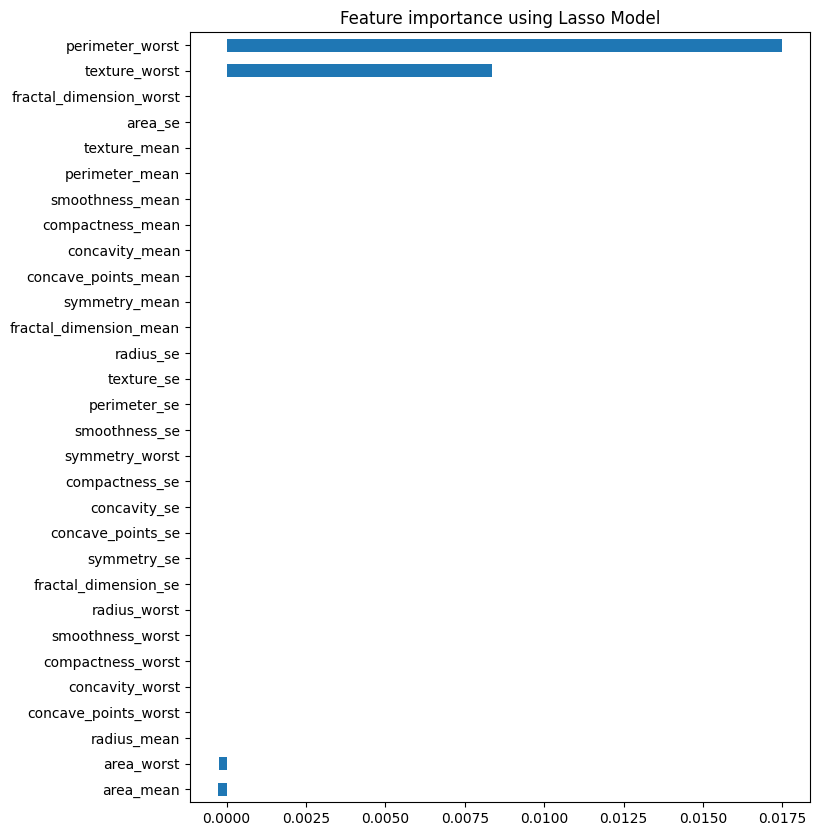

In [28]:
# From the entire dataset,
      #Lasso chose perimeter_worst, texture_worst, area_worst, and area_mean.
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")



In [29]:
# dataset backwards elimination feature selection, lasso, feature importance

dataset_befs=df[['diagnosis','radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se',
            'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean',
              'concave_points_worst','texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst',
              'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']]

In [30]:
# can see the means of individual features, grouped by diagnosis
dataset_befs.groupby('diagnosis').mean()

,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,compactness_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,,,,,,,,,,,,,,,,,,,
0,12.146524,0.080085,0.025717,0.284082,0.007196,0.025997,0.009858,13.379801,21.135148,0.021438,462.790196,0.074444,23.515070,558.899440,0.166238,0.270246,0.079442,0.124959,87.005938
1,17.462830,0.145188,0.087990,0.609083,0.006780,0.041824,0.015060,21.134811,72.672406,0.032281,978.376415,0.182237,29.318208,1422.286321,0.450606,0.323468,0.091530,0.144845,141.370330


#### Correlation Analysis:

Checking for multicollinearity through correlation analysis. This helps in identifying and addressing issues that can affect model performance.
Removing highly correlated features can reduce redundancy. However, ensure that the feature removed is not more predictive than the one retained.

In [31]:
#Predictive Analysis
#Predictive model - first need to check for correlation in the dataset

dataset_fs = dataset_befs

df_fs_corr = dataset_fs.corr() #finds linear pearson correlation
df_fs_corr = df_fs_corr[df_fs_corr < 1] #to avoid correlating values with themselves (ie corr = 1)
df_fs_corr

,diagnosis,radius_mean,compactness_mean,concave_points_mean,radius_se,smoothness_se,concavity_se,concave_points_se,radius_worst,area_se,compactness_se,area_mean,concave_points_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_worst,perimeter_worst
diagnosis,NaN,0.730029,0.596534,0.776614,0.567134,-0.067016,0.253730,0.408042,0.776454,0.548236,0.292999,0.708984,0.793566,0.456903,0.733825,0.659610,0.416294,0.323872,0.421465,0.782914
radius_mean,0.730029,NaN,0.506124,0.822529,0.679090,-0.222600,0.194204,0.376169,0.969539,0.735864,0.206000,0.987357,0.744214,0.297008,0.941082,0.526911,0.163953,0.007066,0.119616,0.965137
compactness_mean,0.596534,0.506124,NaN,0.831135,0.497473,0.135299,0.570517,0.642262,0.535315,0.455653,0.738722,0.498502,0.815573,0.248133,0.509604,0.816275,0.510223,0.687382,0.565541,0.590210
concave_points_mean,0.776614,0.822529,0.831135,NaN,0.698050,0.027653,0.439167,0.615634,0.830318,0.690299,0.490424,0.823269,0.910155,0.292752,0.809630,0.752399,0.375744,0.368661,0.452753,0.855923
radius_se,0.567134,0.679090,0.497473,0.698050,NaN,0.164514,0.332358,0.513346,0.715065,0.951830,0.356065,0.732562,0.531062,0.194799,0.751548,0.380585,0.094543,0.049559,0.141919,0.719684
smoothness_se,-0.067016,-0.222600,0.135299,0.027653,0.164514,NaN,0.268685,0.328429,-0.230691,0.075150,0.336696,-0.166777,-0.102007,-0.074743,-0.182195,-0.058298,-0.107342,0.101480,0.314457,-0.217304
concavity_se,0.253730,0.194204,0.570517,0.439167,0.332358,0.268685,NaN,0.771804,0.186904,0.270895,0.801268,0.207660,0.440472,0.100241,0.188353,0.662564,0.197788,0.439329,0.168481,0.226680
concave_points_se,0.408042,0.376169,0.642262,0.615634,0.513346,0.328429,0.771804,NaN,0.358127,0.415730,0.744083,0.372320,0.602450,0.086741,0.342271,0.549592,0.143116,0.310655,0.215351,0.394999
radius_worst,0.776454,0.969539,0.535315,0.830318,0.715065,-0.230691,0.186904,0.358127,NaN,0.757373,0.204607,0.962746,0.787424,0.359921,0.984015,0.573975,0.243529,0.093492,0.216574,0.993708
area_se,0.548236,0.735864,0.455653,0.690299,0.951830,0.075150,0.270895,0.415730,0.757373,NaN,0.284840,0.800086,0.538166,0.196497,0.811408,0.385100,0.074126,0.017539,0.125389,0.761213


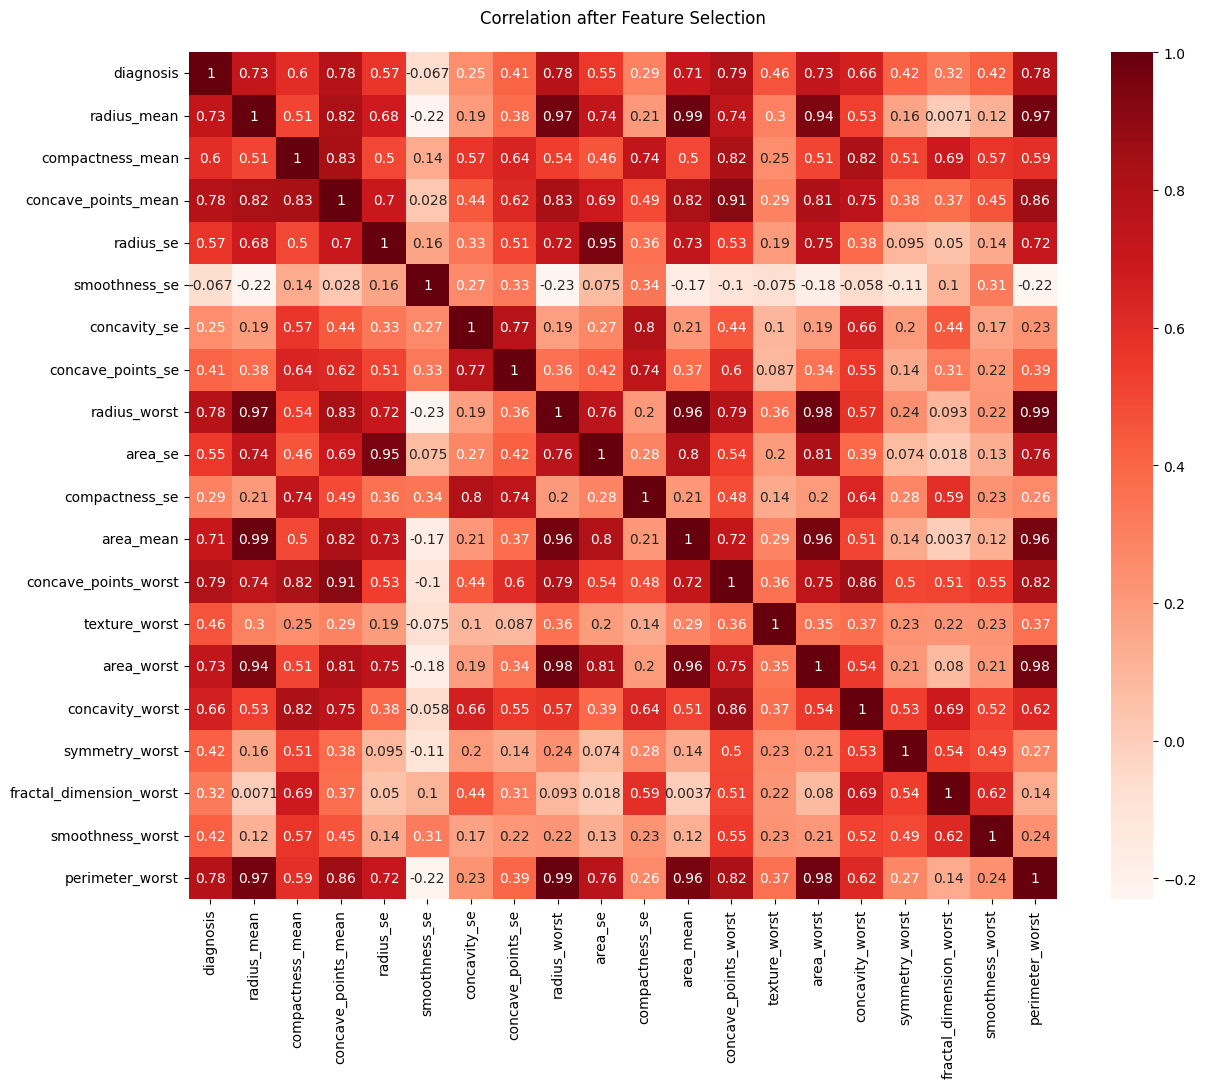

In [32]:
# Using Pearson Correlation
plt.figure(figsize=(14,11))
cor = dataset_befs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation after Feature Selection\n", size=12)
plt.show()
# radius_mean is highly corr with radius_worst and area_worst, implies multicollinearity.
            #Radius_worst is the most highly corr with diagnosis, so I will keep that one
# compactness
# area mean highly corr w radius_mean, remove area_mean

#### Boxplots for Feature Visualization:

The boxplots for different features against the diagnosis are useful for visualizing the distribution of these features across different classes.
This can provide insights into which features are more discriminative in terms of the target variable.

Text(0.5, 0, 'Diagnosis')

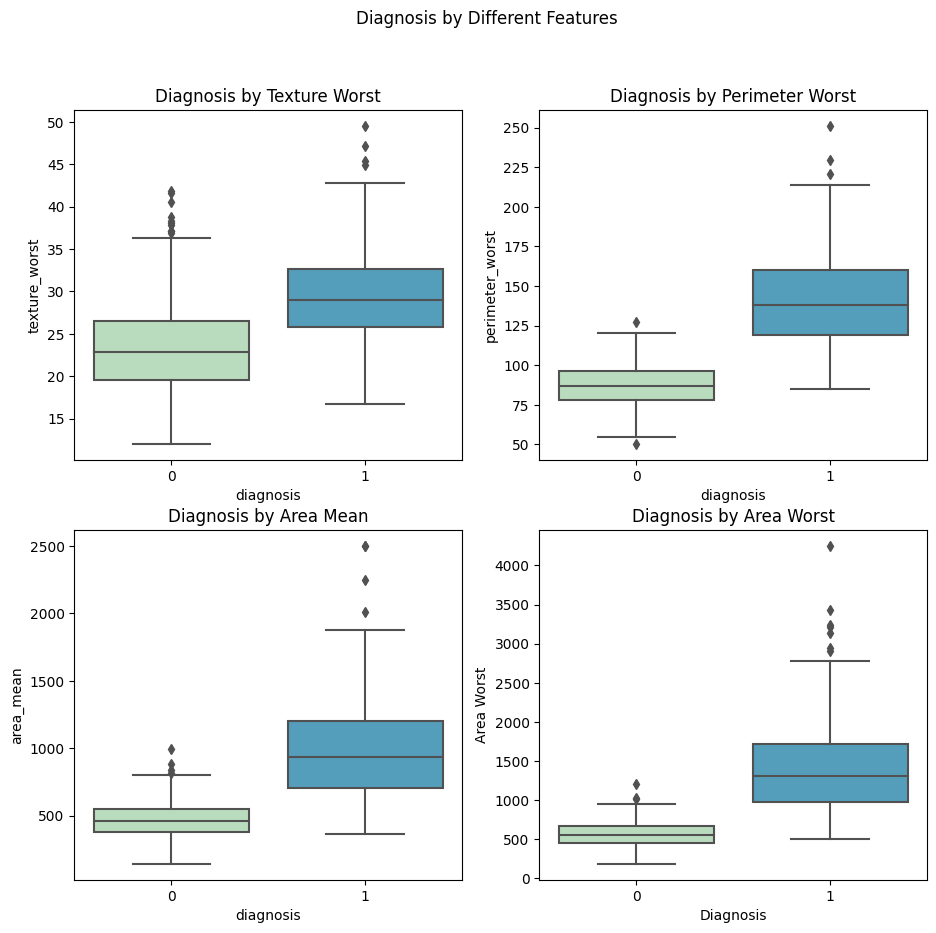

In [33]:
f, axes= plt.subplots(2, 2, figsize=(11,10), facecolor='white')
f.suptitle('Diagnosis by Different Features')

# radius_mean, concave_points_mean, texture_mean, symmetry_worst

ax1 = sns.boxplot(x='diagnosis',  y='perimeter_worst', palette='GnBu', data= dataset_befs, ax=axes[0,1])
ax1.title.set_text('Diagnosis by Perimeter Worst')
plt.ylabel("Perimeter Worst")
plt.xlabel("Diagnosis")

ax2 = sns.boxplot(x='diagnosis', y='texture_worst', palette='GnBu', data=dataset_befs, ax=axes[0,0])
ax2.title.set_text("Diagnosis by Texture Worst")
plt.ylabel("Texture Worst")
plt.xlabel("Diagnosis")

ax3= sns.boxplot(x='diagnosis', y='area_mean', palette='GnBu', data=dataset_befs, ax=axes[1,0])
ax3.title.set_text("Diagnosis by Area Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Area Mean")


ax4=sns.boxplot(x='diagnosis', y='area_worst', palette='GnBu', data=dataset_befs, ax=axes[1,1])
ax4.title.set_text("Diagnosis by Area Worst")
plt.ylabel("Area Worst")
plt.xlabel("Diagnosis")

In [34]:
dataset_fs = dataset_befs
dataset_fs.shape

(569, 20)

## Normalization

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before train-test split
scaler = StandardScaler()
X_fs_scaled = scaler.fit_transform(X_fs)

# Splitting the scaled data
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
    X_fs_scaled, y_fs, test_size=0.2, random_state=1, stratify=y_fs)

print("Data scaling and splitting completed.")


Data scaling and splitting completed.


# 3. Model Construction


## Split the dataset into training and testing sets

#### Training and Test Set Splitting:

Splitting the dataset into training and validation sets using stratification. This ensures that both sets are representative of the overall dataset.

In [36]:
#training and testing set size

train_size=int(0.80*dataset_fs.shape[0])
test_size=int(0.20*dataset_fs.shape[0])
print("80% training set size: "+ str(train_size))
print("20% validation set size: "+str(test_size))

# Shuffle dataset and get required features

Data=dataset_fs.sample(frac=1)
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']

80% training set size: 455
20% validation set size: 113


In [37]:
print(X_fs.columns.tolist())

['radius_mean', 'compactness_mean', 'concave_points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave_points_se', 'radius_worst', 'area_se', 'compactness_se', 'area_mean', 'concave_points_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst']


In [38]:
##############################################################################################
# Split-out dataset
##############################################################################################
array = dataset_fs.values
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']
# dataset_fs['diagnosis'] = diagnosis

print('Class labels:', np.unique(y_fs)) #split the data into train and test
# using holdout

from sklearn.model_selection import train_test_split
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(
    X_fs, y_fs, test_size=0.2, random_state = 1, stratify=y_fs)

#stratify ensures the train_test_split method returns trianing and test subsets that have the same
# proportion of class labels as the input dataset

# Eg, if 20% of patients have breast cancer and 80% don’t have breast cancer, setting ‘stratify’ to y
# will ensure that the random split has 20% of patients w breast cancer and 70% of patients w/o breast cancer.
print('Dataset successfully split using stratify.')

Class labels: [0 1]
Dataset successfully split using stratify.


## Build machine learning models

### 1. Decision Tree Model
This section involves training an initial Decision Tree model to establish a baseline.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_fs = dataset_fs.drop('diagnosis', axis=1)
y_fs = dataset_fs['diagnosis']
X_train_fs, X_validation_fs, y_train_fs, y_validation_fs = train_test_split(X_fs, y_fs, test_size=0.20, random_state=1)

# Training the initial model
classifier_dt_fs = DecisionTreeClassifier()
classifier_dt_fs.fit(X_train_fs, y_train_fs)
print('Initial Decision Tree model trained.')


Initial Decision Tree model trained.


#### 2. Hyperparameter Tuning Using Randomized Search
Optimizing the Decision Tree model by tuning hyperparameters.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from time import time
from sklearn.tree import DecisionTreeClassifier

# Function to report the results of the Randomized Search
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f}% (std: {1:.2f})"
                  .format(results['mean_test_score'][candidate] * 100,
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [41]:
# Parameter distribution for Randomized Search
param_dist = {
    "max_depth": [2, 10],
    "max_features": randint(1, 9),
    "random_state": randint(0, 100),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

In [42]:
# Running Randomized Search
n_iter_search = 50
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=n_iter_search, cv=10)

start = time()
random_search.fit(X_fs, y_fs)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))

# Call the report function with the results
report(random_search.cv_results_)

RandomizedSearchCV took 3.97 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 94.55% (std: 0.03)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 59}

Model with rank: 2
Mean validation score: 94.38% (std: 0.04)
Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'random_state': 43}

Model with rank: 2
Mean validation score: 94.38% (std: 0.03)
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 63}



#### 3. Pruning the Decision Tree
Pruning the tree to find an optimal balance between complexity and performance.

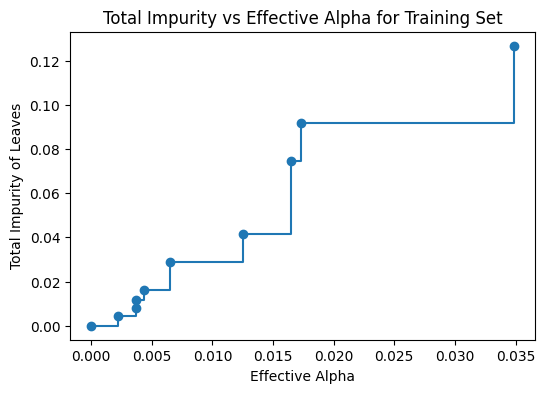

In [43]:
# Pruning the Decision Tree
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_fs, y_train_fs)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Evaluating models for each alpha
clfs = [DecisionTreeClassifier(random_state=0, ccp_alpha=alpha).fit(X_train_fs, y_train_fs) for alpha in ccp_alphas]

# Plotting impurity vs effective alpha
plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

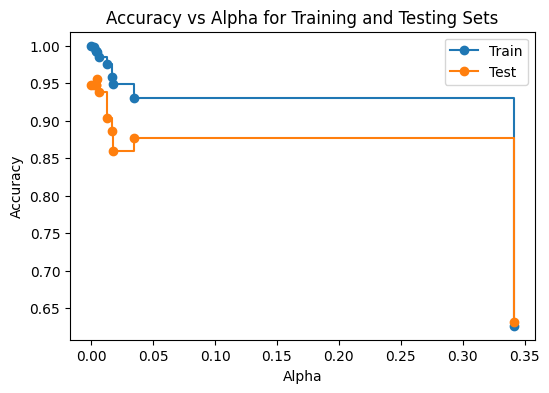

In [44]:
# Accuracy vs Alpha for Training and Testing Sets
train_scores = [clf.score(X_train_fs, y_train_fs) for clf in clfs]
test_scores = [clf.score(X_validation_fs, y_validation_fs) for clf in clfs]

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()

#### 4. Refit Model using Best Hyperparameters

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the Decision Tree classifier with selected hyperparameters
dt_clf_fs = DecisionTreeClassifier(ccp_alpha=0.11, max_features=7, criterion='entropy',
                                   max_depth=10, min_samples_leaf=7, random_state=75,
                                   min_samples_split=8)
dt_clf_fs.fit(X_train_fs, y_train_fs)

# Predicting and evaluating the model
y_pred_fs = dt_clf_fs.predict(X_validation_fs)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_validation_fs, y_pred_fs) * 100))
print("\nClassification Report:\n", classification_report(y_validation_fs, y_pred_fs))
print("\nConfusion Matrix:\n", confusion_matrix(y_validation_fs, y_pred_fs))


Decision Tree Accuracy: 93.86%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix:
 [[68  4]
 [ 3 39]]


#### 5. Visualizing the Decision Tree
Visualizing the trained Decision Tree to understand its structure.

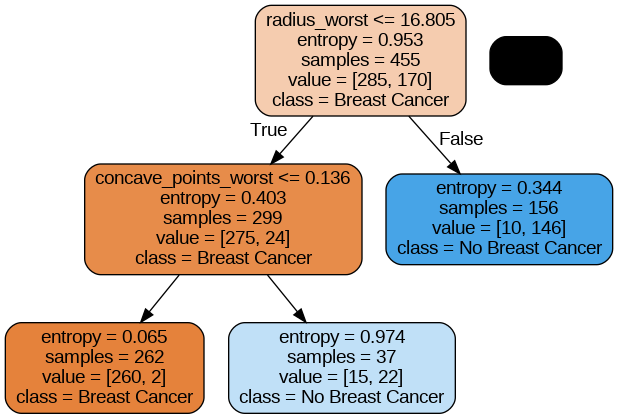

In [46]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Visualizing the Decision Tree
dot_data = export_graphviz(dt_clf_fs, filled=True, rounded=True, class_names=['Breast Cancer', 'No Breast Cancer'],
                           feature_names=X_fs.columns, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


#### 6. Pruning the Decision Tree
Implementing pruning to reduce overfitting and improve model generalization.

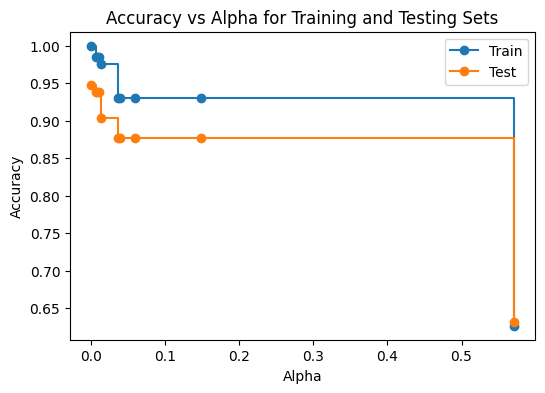

In [47]:
# Pruning the Decision Tree
path = dt_clf_fs.cost_complexity_pruning_path(X_train_fs, y_train_fs)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train Decision Trees for each alpha and evaluate their performance
clfs = [DecisionTreeClassifier(random_state=0, ccp_alpha=alpha).fit(X_train_fs, y_train_fs) for alpha in ccp_alphas]

# Plotting accuracy vs alpha for training and testing sets
train_scores = [clf.score(X_train_fs, y_train_fs) for clf in clfs]
test_scores = [clf.score(X_validation_fs, y_validation_fs) for clf in clfs]

plt.figure(figsize=(6, 4))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()


#### 7. Comparing Gini Index and Entropy
Comparing performance using different criteria (Gini Index and Entropy).

In [48]:
def calc_accuracy(y_true, y_pred):
    """
    Calculates and prints the accuracy, confusion matrix, and classification report.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    """
    accuracy = accuracy_score(y_true, y_pred) * 100
    conf_matrix = confusion_matrix(y_true, y_pred)
    classif_report = classification_report(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classif_report)


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and train the Decision Tree model using the Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(X_train_fs, y_train_fs)

# Define and train the Decision Tree model using the Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy.fit(X_train_fs, y_train_fs)

# Now you can predict using these models and calculate the accuracy
print("Performance using Gini Index:")
y_pred_gini = clf_gini.predict(X_validation_fs)
calc_accuracy(y_validation_fs, y_pred_gini)

print("Performance using Entropy:")
y_pred_entropy = clf_entropy.predict(X_validation_fs)
calc_accuracy(y_validation_fs, y_pred_entropy)


Performance using Gini Index:
Accuracy: 94.74%
Confusion Matrix:
[[71  1]
 [ 5 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Performance using Entropy:
Accuracy: 94.74%
Confusion Matrix:
[[72  0]
 [ 6 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Develop a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_fs, y_train_fs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# Display the coefficients
coefficients = pd.DataFrame({"Feature": X_fs.columns, "Coefficient": logistic_model.coef_[0]})
print(coefficients)

                    Feature  Coefficient
0               radius_mean    -1.756170
1          compactness_mean     0.443730
2       concave_points_mean     0.319763
3                 radius_se    -0.086607
4             smoothness_se     0.017359
5              concavity_se     0.129256
6         concave_points_se     0.046597
7              radius_worst    -1.439387
8                   area_se     0.044055
9            compactness_se     0.057315
10                area_mean    -0.000392
11     concave_points_worst     0.611472
12            texture_worst     0.147276
13               area_worst     0.026370
14          concavity_worst     1.686900
15           symmetry_worst     0.529578
16  fractal_dimension_worst     0.098388
17         smoothness_worst     0.226472
18          perimeter_worst     0.197772


In [52]:
# For a more detailed interpretation, use statsmodels
X_train_fs_sm = sm.add_constant(X_train_fs)
logit_model = sm.Logit(y_train_fs, X_train_fs_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.028572
         Iterations 21
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Dec 2023   Pseudo R-squ.:                  0.9568
Time:                        11:47:16   Log-Likelihood:                -13.000
converged:                       True   LL-Null:                       -300.69
Covariance Type:            nonrobust   LLR p-value:                7.853e-110
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      43.4332     45.614      0.952      0.341     -45.969  

In [53]:
# Interpretation of the coefficients
print("\nInterpretation of Coefficients:")
print("Positive Coefficients indicate that with the increase in that feature's value, the probability of the diagnosis being 'Malignant' (1) increases.")
print("Negative Coefficients indicate that with the increase in that feature's value, the probability of the diagnosis being 'Benign' (0) increases.")
print("The magnitude of these coefficients indicates the strength of the association. Larger absolute values indicate a stronger relationship.")



Interpretation of Coefficients:
Positive Coefficients indicate that with the increase in that feature's value, the probability of the diagnosis being 'Malignant' (1) increases.
Negative Coefficients indicate that with the increase in that feature's value, the probability of the diagnosis being 'Benign' (0) increases.
The magnitude of these coefficients indicates the strength of the association. Larger absolute values indicate a stronger relationship.


In [54]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegressionCV

# Evaluate the performance of the initial model
y_pred_initial = logistic_model.predict(X_validation_fs)
roc_auc_initial = roc_auc_score(y_validation_fs, y_pred_initial)
precision_initial, recall_initial, f1_score_initial, _ = precision_recall_fscore_support(y_validation_fs, y_pred_initial, average='binary')

print("Initial Model Performance:")
print(f"ROC-AUC: {roc_auc_initial}")
print(f"Precision: {precision_initial}")
print(f"Recall: {recall_initial}")
print(f"F1 Score: {f1_score_initial}")
print("\nClassification Report:\n", classification_report(y_validation_fs, y_pred_initial))



Initial Model Performance:
ROC-AUC: 0.933531746031746
Precision: 0.9736842105263158
Recall: 0.8809523809523809
F1 Score: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Analysis of the Initial Model Performance:

ROC-AUC (Initial): The ROC-AUC of 0.9335 is quite high, indicating good model performance in distinguishing between the two classes.

Precision (Initial): With a precision of 0.9737, the model has a high rate of correctly predicting malignant tumors.

Recall (Initial): The recall of 0.8810 suggests that the model is quite good but not perfect at identifying all true cases of malignant tumors.

F1 Score (Initial): An F1 score of 0.925 indicates a strong balance between precision and recall.

In [55]:
# Improve model performance using regularization techniques
# Using LogisticRegressionCV for automatic regularization strength tuning
logistic_model_cv = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear')
logistic_model_cv.fit(X_train_fs, y_train_fs)

# Re-evaluate the model performance
y_pred_improved = logistic_model_cv.predict(X_validation_fs)
roc_auc_improved = roc_auc_score(y_validation_fs, y_pred_improved)
precision_improved, recall_improved, f1_score_improved, _ = precision_recall_fscore_support(y_validation_fs, y_pred_improved, average='binary')

print("\nImproved Model Performance:")
print(f"ROC-AUC: {roc_auc_improved}")
print(f"Precision: {precision_improved}")
print(f"Recall: {recall_improved}")
print(f"F1 Score: {f1_score_improved}")
print("\nClassification Report:\n", classification_report(y_validation_fs, y_pred_improved))




Improved Model Performance:
ROC-AUC: 0.945436507936508
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F1 Score: 0.9382716049382716

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Analysis of the Improved Model Performance:

ROC-AUC (Improved): An increase to 0.9454 shows that the model's ability to distinguish between classes has improved.

Precision (Improved): Remains high at 0.9744, indicating the model’s accuracy in predicting malignant cases remains strong.

Recall (Improved): An increase to 0.9048 means the model is now better at capturing true malignant cases.

F1 Score (Improved): The F1 score has increased to 0.9383, reflecting an improved balance between precision and recall.

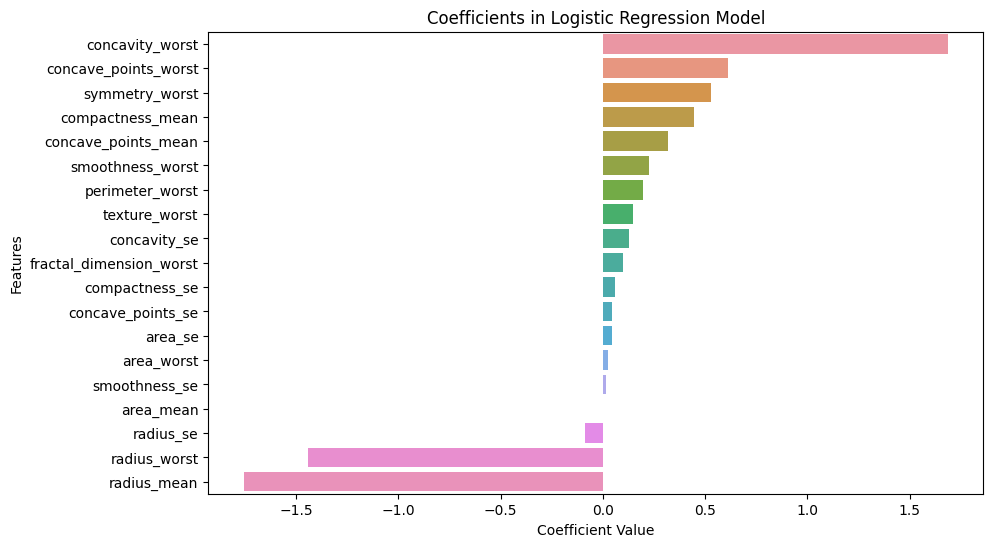

In [56]:
import matplotlib.pyplot as plt

# Visualize the coefficients of the logistic regression model
coefficients = pd.DataFrame({"Feature": X_fs.columns, "Coefficient": logistic_model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coefficients in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()



Conclusion and Discussion:

The improvement in ROC-AUC, recall, and F1 score, with precision remaining high, suggests that regularization has helped in enhancing the model’s generalization ability without compromising its accuracy.
Regularization techniques like L2 penalty used in LogisticRegressionCV have likely helped in reducing overfitting, making the model more robust, especially for the malignant cases.
The increase in recall is particularly important in healthcare scenarios, as it reduces the likelihood of false negatives (i.e., failing to identify malignant cases).


### 1. Gaussian Naive Bayes Model Training
Start by training the Gaussian Naive Bayes model and performing initial predictions.

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X = dataset_fs.drop('diagnosis', axis=1)
y = dataset_fs['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Training the Gaussian Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
print("Gaussian Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Gaussian Naive Bayes Confusion Matrix:
 [[70  2]
 [ 4 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Performance Metrics Comparison:**

ROC-AUC:
LR: 0.9454

GNB: Not provided, but typically Naive Bayes models also perform well in terms of ROC-AUC.

Precision, Recall, and F1 Score:
Both models have similar precision and recall values for both classes (0 and 1). However, LR has a slightly higher recall for class 1 (0.905 vs. 0.900) and a slightly higher F1 score for class 1 (0.938 vs. 0.93).

Accuracy: LR: 0.96
GNB: 0.95

Both models show high accuracy, but LR is slightly higher.

#### 2. Cross-Validation of Gaussian Naive Bayes
Evaluate the model using cross-validation to ensure its robustness.

In [58]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 10-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy') * 100
print("Gaussian Naive Bayes Cross-validation Scores:\n", scores)
print("\nMean CV Score: {:.2f}%".format(np.mean(scores)))


Gaussian Naive Bayes Cross-validation Scores:
 [94.73684211 87.71929825 91.22807018 94.73684211 92.98245614 96.49122807
 92.98245614 98.24561404 94.73684211 96.42857143]

Mean CV Score: 94.03%


LR is a more flexible model compared to GNB, especially when dealing with complex relationships and interactions between features. This could be why LR shows a slightly better performance in this case.

LR, especially with regularization, is more robust to overfitting compared to Naive Bayes. This could be a contributing factor to its slightly better performance.

#### 3. Visualization of Performance Metrics
Visualize the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score.

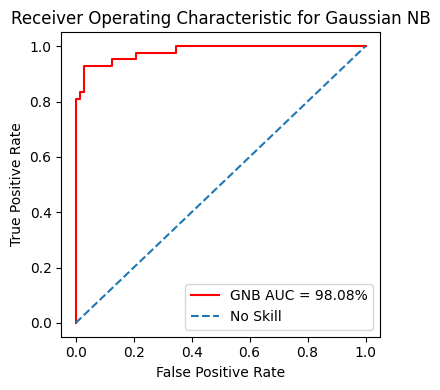

AUC ROC Score for Gaussian NB: 98.08%


In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating probabilities and plotting ROC curve
y_prob = classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate) * 100

plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate, color='red', label='GNB AUC = {:.2f}%'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.title('Receiver Operating Characteristic for Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Printing the AUC score
print('AUC ROC Score for Gaussian NB: {:.2f}%'.format(roc_auc))


Conclusion:
Both Logistic Regression and Gaussian Naive Bayes have shown strong performance. LR might be preferred due to its more straightforward interpretability compared to Naive Bayes.

## Neural Network

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_fs.shape[1], activation='relu'))  # Input layer & first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

### Train the Neural Network

In [61]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_fs, y_train_fs, validation_data=(X_validation_fs, y_validation_fs), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
46/46 [==============================] - 5s 25ms/step - loss: 12.3914 - accuracy: 0.4901 - val_loss: 4.5676 - val_accuracy: 0.4649
Epoch 2/100
46/46 [==============================] - 0s 10ms/step - loss: 2.0519 - accuracy: 0.7473 - val_loss: 2.0613 - val_accuracy: 0.6842
Epoch 3/100
46/46 [==============================] - 0s 10ms/step - loss: 1.5949 - accuracy: 0.8000 - val_loss: 0.8633 - val_accuracy: 0.8684
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 0.9161 - accuracy: 0.8527 - val_loss: 0.5350 - val_accuracy: 0.8947
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 0.9336 - accuracy: 0.8396 - val_loss: 0.4314 - val_accuracy: 0.9123
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.8681 - val_loss: 1.2617 - val_accuracy: 0.7982
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 1.2953 - accuracy: 0.8198 - val_loss: 2.4030 - val_accuracy: 0.7719
Epoch 8/1

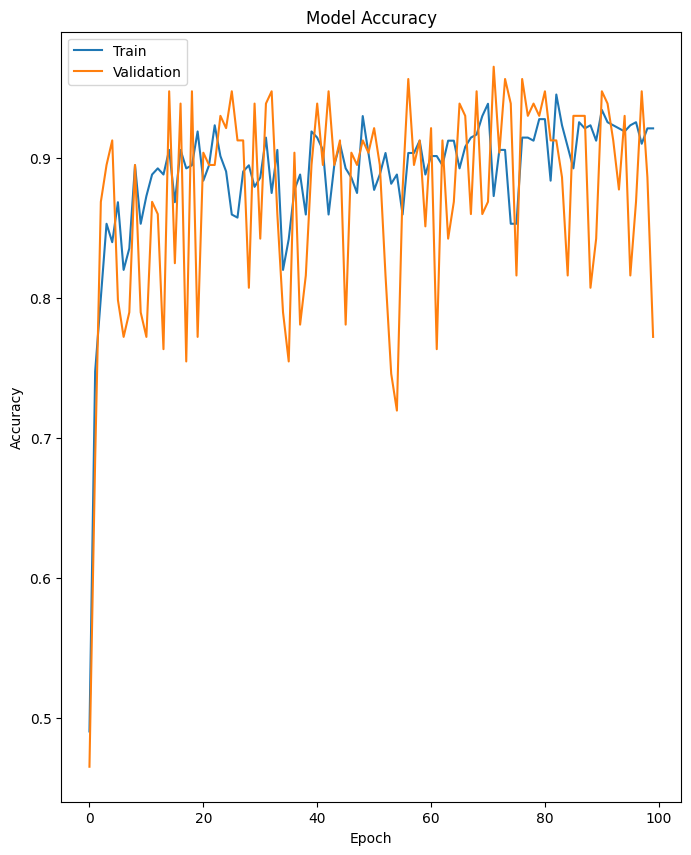

In [62]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model Accuracy Plot Interpretation:
The Model Accuracy plot shows the training and validation accuracy of the neural network over each epoch. Here's what we can interpret from the plot:

Variance: There's noticeable variance in the accuracy between epochs, especially in the validation accuracy. This could be a sign of the model learning but also an indicator of potential overfitting or instability in learning.
Convergence: The model's training accuracy seems to be converging, albeit with fluctuations. This suggests that the model is capable of learning from the dataset.
Generalization Gap: There is a gap between training and validation accuracy, which is expected, but the gap does not seem to be widening significantly as training progresses, which is a good sign for model generalization.

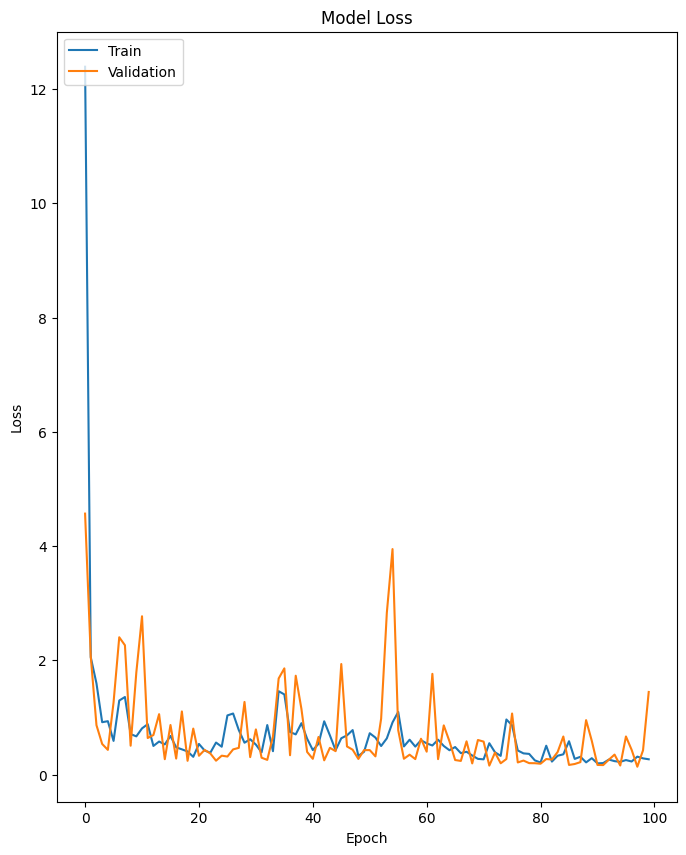

In [63]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Model Loss Plot Interpretation:
The Model Loss plot illustrates the training and validation loss:

Overfitting: Significant spikes and variance in the validation loss might indicate the model is overfitting to the training data, as it does not consistently decrease like the training loss.
Learning Rate: The fluctuation might also suggest the learning rate could be too high, causing the model to overshoot the optimal values during optimization.
Stability: The less stable loss in validation compared to training suggests the model might benefit from techniques that promote stability in training, such as learning rate schedules or early stopping.

### Retrain with regularization

In [64]:
from keras.layers import Dropout

# Redefine the neural network architecture with dropout regularization
model_with_dropout = Sequential()
model_with_dropout.add(Dense(64, input_dim=X_train_fs.shape[1], activation='relu'))
model_with_dropout.add(Dropout(0.5))  # Add dropout layer with a 50% dropout rate
model_with_dropout.add(Dense(32, activation='relu'))
model_with_dropout.add(Dropout(0.5))  # Add another dropout layer with a 50% dropout rate
model_with_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model with dropout
model_with_dropout.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout
history_with_dropout = model_with_dropout.fit(X_train_fs, y_train_fs, validation_data=(X_validation_fs, y_validation_fs), epochs=100, batch_size=10, verbose=1)

# Evaluate the model's performance on the test set
evaluation_with_dropout = model_with_dropout.evaluate(X_validation_fs, y_validation_fs, verbose=0)

# Print the performance metrics
print(f'Test Loss: {evaluation_with_dropout[0]}')
print(f'Test Accuracy: {evaluation_with_dropout[1]}')


Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 58.5448 - accuracy: 0.5121 - val_loss: 7.1895 - val_accuracy: 0.3684
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 33.5474 - accuracy: 0.5143 - val_loss: 1.0465 - val_accuracy: 0.3684
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 19.5554 - accuracy: 0.5363 - val_loss: 0.5324 - val_accuracy: 0.8158
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 14.5707 - accuracy: 0.5231 - val_loss: 0.5318 - val_accuracy: 0.8947
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 10.4228 - accuracy: 0.5604 - val_loss: 0.5921 - val_accuracy: 0.5439
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 7.4408 - accuracy: 0.5055 - val_loss: 0.6142 - val_accuracy: 0.9298
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 5.8468 - accuracy: 0.5626 - val_loss: 0.6122 - val_accuracy: 0.7456
Epoch 8/

Comparison and Discussion:
Accuracy: The logistic regression model has a higher accuracy than the neural network. This may be due to logistic regression's effectiveness with linearly separable data or simpler relationships.

Precision and Recall: The neural network has a higher precision but a significantly lower recall compared to logistic regression. High precision means that when the neural network predicts a case as positive, it is very likely to be correct. However, the lower recall indicates it misses a substantial number of positive cases.

F1 Score: The F1 score, which is the harmonic mean of precision and recall, is also higher for the logistic regression model. This suggests a better balance between precision and recall in logistic regression compared to the neural network.

In [65]:
# Obtain predictions and calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_test_with_dropout = (model_with_dropout.predict(X_validation_fs) > 0.5).astype("int32")

precision_with_dropout = precision_score(y_validation_fs, y_pred_test_with_dropout)
recall_with_dropout = recall_score(y_validation_fs, y_pred_test_with_dropout)
f1_score_with_dropout = f1_score(y_validation_fs, y_pred_test_with_dropout)

print(f'Precision: {precision_with_dropout}')
print(f'Recall: {recall_with_dropout}')
print(f'F1 Score: {f1_score_with_dropout}')

4/4 [==============================] - 0s 3ms/step
Precision: 0.9655172413793104
Recall: 0.6666666666666666
F1 Score: 0.7887323943661971


Potential Reasons Behind Performance Differences:
Model Complexity: The neural network may be too complex or not adequately trained for the dataset, leading to lower performance metrics. Overfitting could also be a factor, despite the use of dropout.

Feature Relationships: If the dataset's features have a linear relationship with the outcome, logistic regression can perform exceptionally well, as suggested by the higher ROC-AUC score.

Data Distribution: Logistic regression might be better suited to the underlying distribution of this particular dataset.

Regularization: The regularization technique used (dropout) may have been too aggressive, leading to underfitting in the neural network.

Training Process: The training epochs, learning rate, or batch size may not have been optimal for the neural network, affecting its learning process.

Conclusion:
The logistic regression model seems to outperform the neural network in this scenario. This might indicate that the dataset favors models that assume a linear boundary or that logistic regression has better captured the underlying patterns in the dataset due to its simplicity and robustness. The neural network could potentially improve with more tuning, such as adjusting the dropout rate, changing the architecture, or using a different regularization technique.

# 4. Model Experimentation

### ROC Curve Comparison
This section involves plotting the ROC curves for the three models to compare their performance visually.

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models for comparison
models = [
    {
        'label': 'Decision Tree',
        'model': DecisionTreeClassifier(ccp_alpha=0.12, max_features=7, criterion='entropy',
                                        max_depth=10, min_samples_leaf=7, random_state=75,
                                        min_samples_split=8)
    },
    {
        'label': 'GaussianNB',
        'model': GaussianNB()
    }
]

# Plotting ROC Curves
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

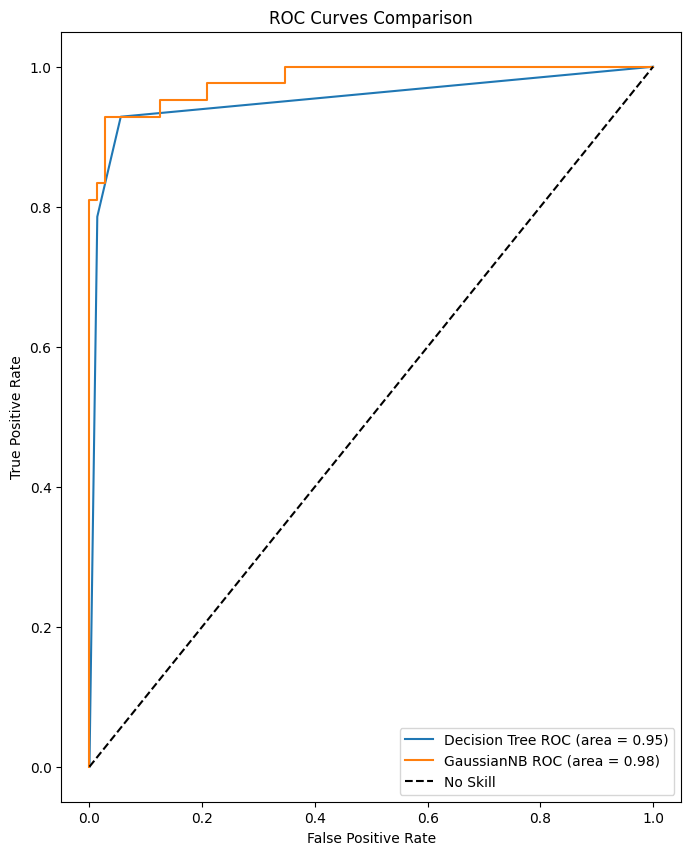

In [67]:
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{m["label"]} ROC (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

### Learning Curve Analysis
This section involves plotting the learning curves for each model to understand how their performance varies with the size of the training set.

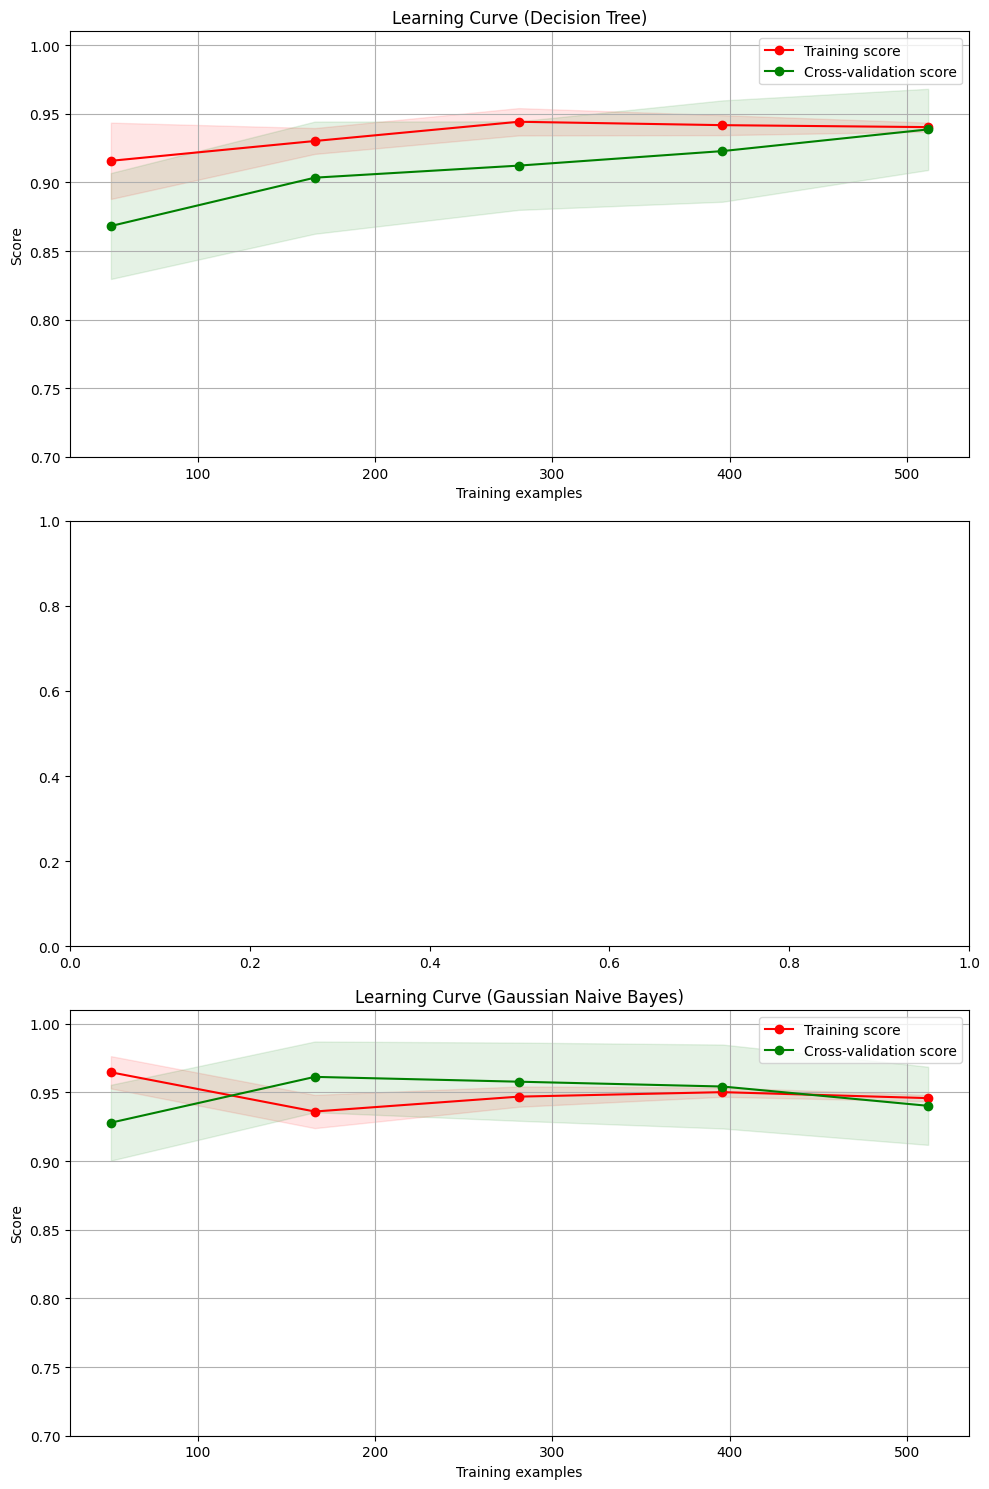

In [74]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Disable parallel processing to avoid the error
n_jobs_param = 1

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Decision Tree Learning Curve
plot_learning_curve(
    DecisionTreeClassifier(ccp_alpha=0.12, max_features=7, criterion='entropy',
                           max_depth=10, min_samples_leaf=7, random_state=75,
                           min_samples_split=8),
    "Learning Curve (Decision Tree)", X, y, axes=axes[0], ylim=(0.7, 1.01), cv=10, n_jobs=n_jobs_param
)

# Gaussian Naive Bayes Learning Curve
plot_learning_curve(
    GaussianNB(), "Learning Curve (Gaussian Naive Bayes)", X, y, axes=axes[2], ylim=(0.7, 1.01), cv=10, n_jobs=n_jobs_param
)

plt.tight_layout()
plt.show()


# 5. Model Evaluation and Interpretation

### Using LIME
LIME generates locally faithful explanations, meaning it perturbs the input data around a prediction and fits a simple model (like a linear model) to these perturbed data to explain the prediction locally.

In [69]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=efb97864aa0438c795c530e70ca6d50222fd82c176aaabbed5cb483e9ebb006b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [70]:
import lime
import lime.lime_tabular

# Instantiate the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Breast Cancer', 'Breast Cancer'],
    mode='classification'
)

# Explain a single prediction from the test set
i = 0  # Index of the instance you want to explain
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [71]:
# Show the explanation
exp.show_in_notebook(show_all=False)